<h1><center> Análise de pellets plásticos como ferramenta para o estudo de permanência de microplásticos em praias arenosas. </center></h1>

Juana Gerevini Bozzetto

# 03. Recortando Área de Interesse (Pellet)

- Recortar área de interesse
- Ver se o programa funciona para maior parte das imagens

In [13]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pathlib import Path


#--- Importando as imagens que serão analisadas ---#

from skimage import io

#existem x pastas nomeadas "dados_partex" pois meu computador não tinha ram pra tudo rsrs

#lista_fotos = sorted(glob("dados_partei/*.jpg"))
#lista_fotos = sorted(glob("dados_parteii/*.jpg"))
lista_fotos = sorted(glob("dados_parteiii/*.jpg"))

images = {}
for name in lista_fotos:
    images.update(
        {
            Path(name).stem: io.imread(name)
        }
    )

In [14]:
from skimage import segmentation
from skimage import filters, morphology
from skimage.color import rgb2gray
from skimage.measure import label, regionprops


def remove_background(foto):
    img = rgb2gray(foto)
    mask = img > filters.threshold_otsu(img)
    clean_border = segmentation.clear_border(mask).astype(np.int64) 
    img_edges = segmentation.mark_boundaries(img, clean_border)
    label_img = label(clean_border)
    regions = regionprops(label_img)
    area = 0
    for region in regions:
        if region.area > area:
            area = region.area
            pellet = region
    maskr = morphology.remove_small_objects(mask, pellet.area)
    masked = foto.copy()
    masked[~maskr] = 255
    return masked, maskr

In [15]:
#--- Recortando a área de interesse (pellet) ---#

images_nobg = {}
for foto, data in images.items():
    masked = remove_background(data)
    images_nobg.update({foto: masked})

In [17]:
def plot_recorte(foto):
    plt.figure(figsize=(4, 4))
    plt.imshow(images_nobg[foto][0])
    plt.title(foto)

/tmp/ipykernel_17696/1009440921.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 4))


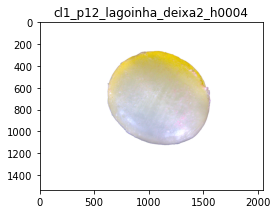

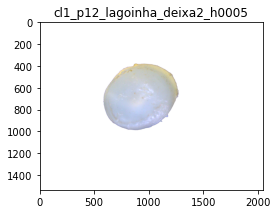

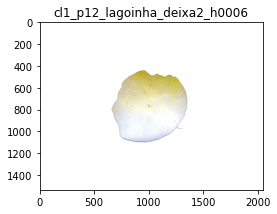

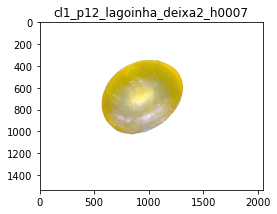

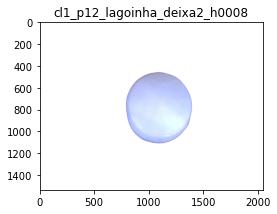

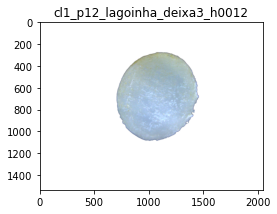

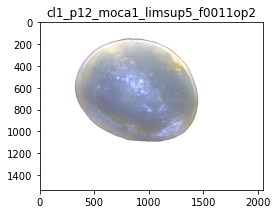

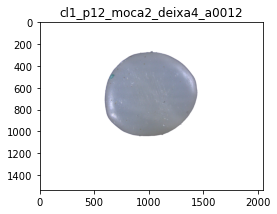

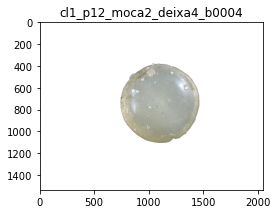

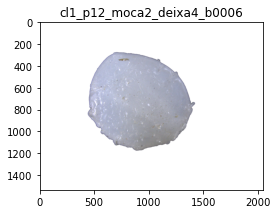

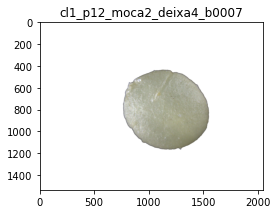

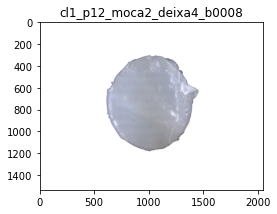

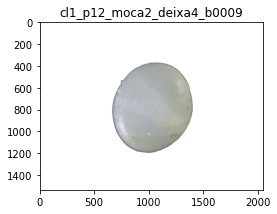

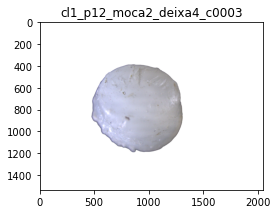

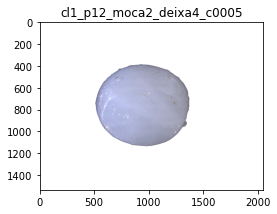

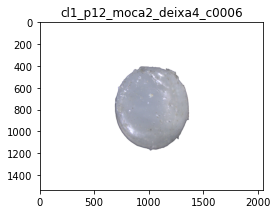

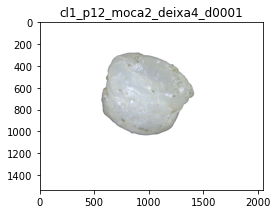

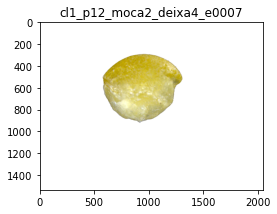

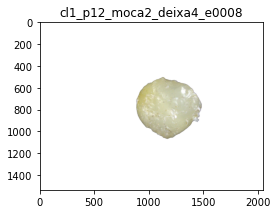

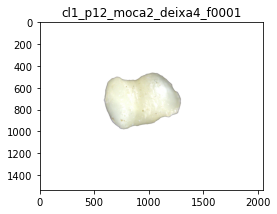

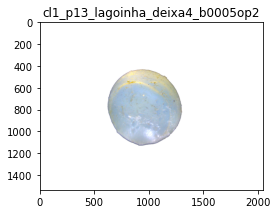

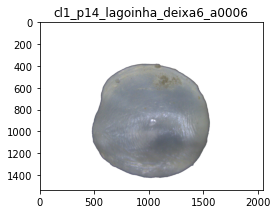

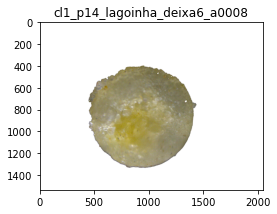

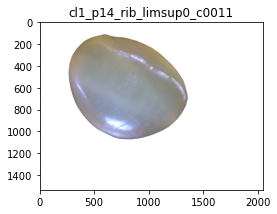

In [18]:
for foto, (masked, maskr) in images_nobg.items():
    plot_recorte(foto)

In [25]:
#Quantas fotos do banco foram recortadas

imgs_rec = len(sorted(glob("dados_parteiii/*.jpg"))) + len(sorted(glob("dados_parteii/*.jpg"))) + len(sorted(glob("dados_partei/*.jpg")))

imgs_tot = 236 #total de imagens no banco

porc_imgs = imgs_rec*100/imgs_tot

print(round(porc_imgs,2),"% das fotos foram recortadas")

62.71 % das fotos foram recortadas


## Observações

- 148 das 236 fotos o recorte funcionou
- A maioria das que não foram recortadas são "translúcidas" ou "beeeem amarelas"
- Algumas das que não foram cortadas são de pellets coloridos (indiferente pra pesquisa)